# Tarea 6: Reducción de Dimensiones: caso de insuficiencia cardiaca 

Tecnológico de Costa Rica<br/>
Aprendizaje Automático <br/>


Cuaderno base para realizar la tarea 6, en la que se usará la reducción de dimensiones para visualizar la estructura de datos en espacios de muchas dimensiones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')#por windows

## Cargar datos de insuficiencia cardiaca

Los datos quedarán almacenados en X y las etiquetas en y

Los datos originales tienen varias columnas categóricas, que requieren ser 
codificadas one-hot para que tenga sentido.

Cargamos entonces primero los datos crudos, convirtiendo esas columnas a números,
y posteriormente 

In [2]:
archivo_csv = 'heart.csv' 

## Es necesario manejar manualmente la conversión de varias columnas categóricas
converters={}
for i in range(12):
    converters[i] = lambda x : float(x)
    
converters[1] =  lambda x : 1.0 if (x==b'F') else 0.0

# TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
pain_types={b'TA':0.0,b'ATA':1.0,b'NAP':2.0,b'ASY':3.0}
converters[2] = lambda x : pain_types[x]

# RestingECG: resting electrocardiogram results 
#  Normal: Normal, 
#  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
restingECG_types={b'Normal':0.0,b'ST':1.0,b'LVH':2.0}
converters[6] = lambda x : restingECG_types[x]

converters[8] =  lambda x : 1.0 if (x==b'Y') else 0.0

stslope_type = {b'Up':1.0,b'Flat':0.0,b'Down':-1.0}
converters[10] = lambda x : stslope_type[x]

# Carguemos los datos
data = np.genfromtxt(archivo_csv, delimiter=',',skip_header=1,converters=converters)

# Necesitamos recodificar dos columnas y luego armar la matriz de datos a pedazos
enc = OneHotEncoder()
cp=enc.fit_transform(data[:,2].reshape(-1,1)).toarray() # chest pain 
re=enc.fit_transform(data[:,6].reshape(-1,1)).toarray() # resting ECG

print("Datos completos en matriz {0} x {1}".format(data.shape[0],data.shape[1]))

Datos completos en matriz 918 x 12


In [3]:
# La última columna tiene las etiquetas
y=data[:,11].ravel()
print("Label shape:",y.shape)

# La columna col_grupos tiene los grupos
X=np.column_stack((data[:,0:2],cp,data[:,3:6],re,data[:,7:11]))
print("Data shape :",X.shape)

Label shape: (918,)
Data shape : (918, 16)


### Normalización de los datos

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("X normalized",X_normalized)

X normalized [[-1.4331398  -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359  1.93816322 -0.22967867 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972 -0.51595242 -0.22967867 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972  1.93816322 -0.22967867 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563 -0.51595242 -0.22967867 ... -0.8235563  -0.83243239
   1.05211381]]


In [6]:
from sklearn.decomposition import PCA

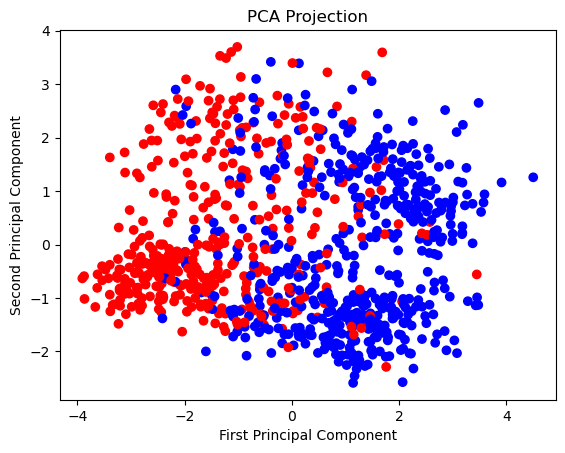

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')

plt.show()

### Métodos de reducción de dimensiones:

# KPCA

In [8]:
from sklearn.decomposition import KernelPCA

In [9]:
kpca = KernelPCA(n_components=2, kernel='poly', gamma=1/10)
X_kpca = kpca.fit_transform(X_normalized)
print(X_kpca)

[[-0.25270119 -2.36809481]
 [-0.14458337 -0.72053322]
 [-0.27678223 -1.16910489]
 ...
 [-0.45667438  0.69264377]
 [ 0.07889663 -1.45408629]
 [-0.19793646 -1.36607488]]


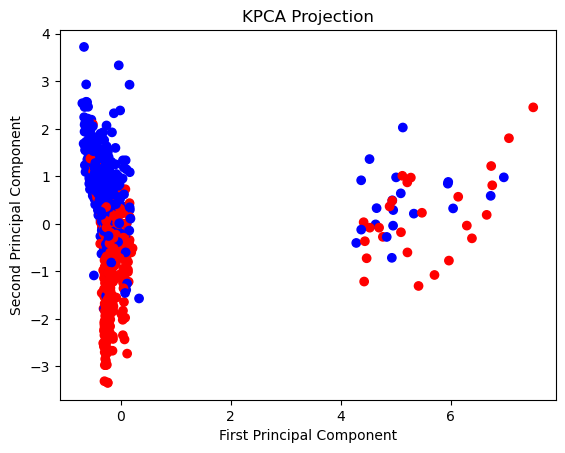

In [10]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KPCA Projection')

plt.show()

# ISOMAP

In [11]:
from sklearn.manifold import Isomap

In [12]:
isomap = Isomap(n_components=2, n_neighbors=800, metric='manhattan')

isomap.fit(X_normalized)

X_isomap = isomap.transform(X_normalized)

print(X_isomap)

[[-9.73760788 -2.49625036]
 [-5.68279533 -1.37967647]
 [-6.09080643  4.2530191 ]
 ...
 [ 5.13820262 -4.23409821]
 [-7.45950005  8.75688383]
 [-8.89802315 -2.16472891]]


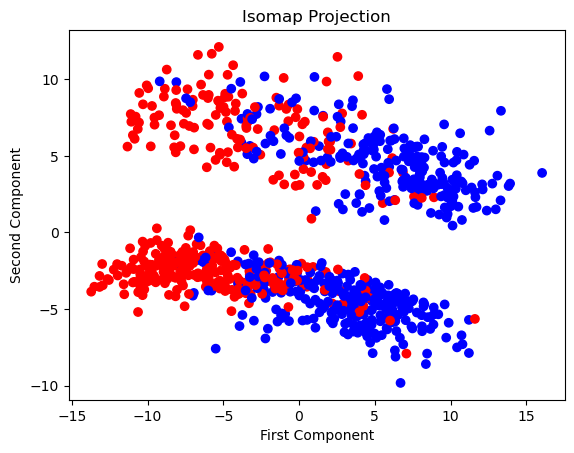

In [13]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Isomap Projection')

plt.show()

### Métodos de reducción de dimensiones (supervisado):

# PLS

In [14]:
from sklearn.cross_decomposition import PLSRegression

In [15]:
# Linear Discriminant Analysis (LDA)
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_normalized, y)[0]

# print the transformed data
print("LDA transformed data:")
print(X_pls)

LDA transformed data:
[[ 2.94437961 -0.85864588]
 [ 1.45553028  0.10806248]
 [ 1.8084946   1.38628186]
 ...
 [-1.774994   -0.71741483]
 [ 2.23881547  0.50133176]
 [ 2.42859547 -0.92884692]]


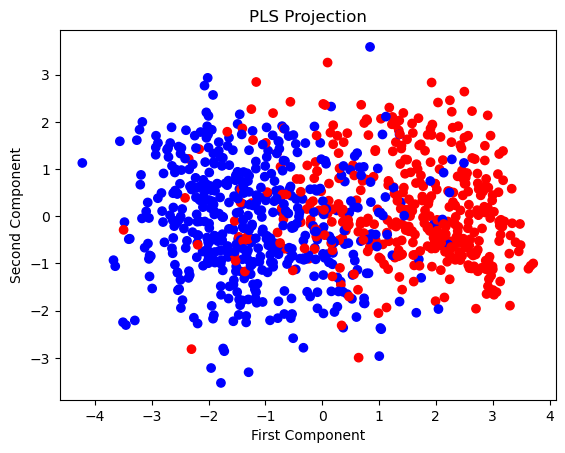

In [16]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PLS Projection')

plt.show()

# UMAP

In [17]:
import umap

In [18]:
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X_normalized, y)

# print the transformed data
print("UMAP transformed data:")
print(X_umap)

UMAP transformed data:
[[12.030929  22.622631 ]
 [ 7.5053306 10.053339 ]
 [10.196109  15.958967 ]
 ...
 [ 5.150017  -4.1897717]
 [26.507324   7.4236264]
 [ 7.810773  14.4320965]]


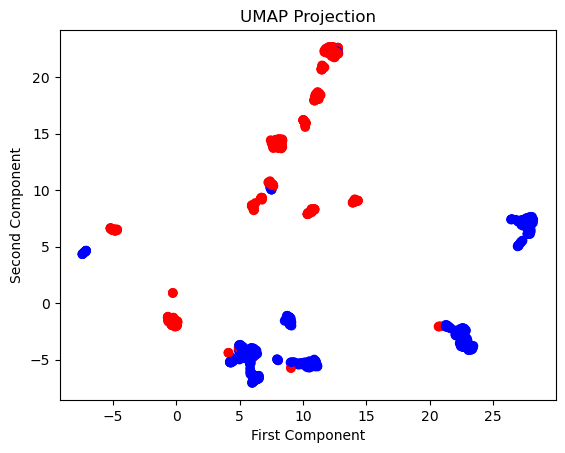

In [19]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('UMAP Projection')

plt.show()

# PaCMAP

In [20]:
import pacmap

In [21]:
# PaCMAP
reducer = pacmap.PaCMAP(n_components =2)
X_pacmap = reducer.fit_transform(X_normalized)

# print the transformed data
print("PaCMAP transformed data:")
print(X_pacmap)

PaCMAP transformed data:
[[-13.440332   -9.980462 ]
 [ -4.514655    3.516146 ]
 [  6.7818866   2.9257023]
 ...
 [  7.47226   -11.793655 ]
 [-14.65194    -2.622523 ]
 [ -8.30579     5.7395325]]


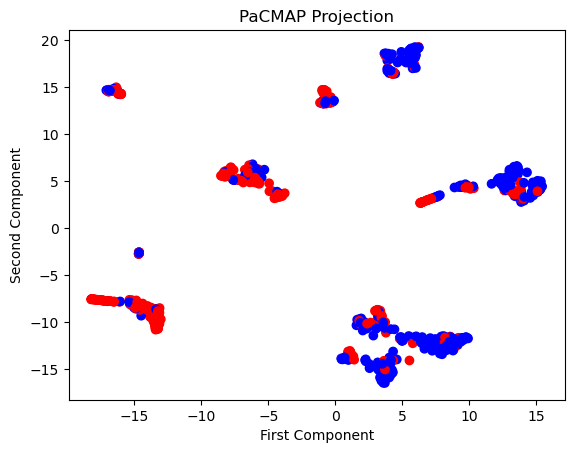

In [22]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=[colors[i] for i in y])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('PaCMAP Projection')

plt.show()

###  Aglomeración

# K-means

In [23]:
from sklearn.cluster import KMeans

In [24]:
def find_clusters(X, k, random_state=0):
    # create an instance of the KMeans class
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    
    # fit the data
    kmeans.fit(X)
    
    # get the cluster assignments
    clusters = kmeans.predict(X)
    
    return clusters

In [25]:
clusters = find_clusters(X_normalized, 9)

# print the cluster assignments
print("Cluster assignments:")
print(clusters)

Cluster assignments:
[3 1 3 8 1 1 3 3 8 3 1 4 3 8 1 3 6 3 6 3 5 3 3 8 1 1 4 3 3 3 1 1 8 4 3 3 8
 3 3 8 3 4 3 1 8 1 6 3 1 6 8 8 3 3 8 3 8 1 4 4 3 1 6 8 3 3 6 3 4 6 4 3 6 4
 8 1 6 6 3 6 1 3 6 3 8 8 8 3 5 8 3 6 3 8 1 8 3 1 6 3 4 6 8 8 6 3 4 3 6 3 3
 8 6 3 1 6 6 4 5 5 1 1 4 8 3 3 3 6 3 1 1 6 4 4 4 1 3 3 8 8 8 4 4 6 3 6 3 3
 3 8 3 3 3 6 3 8 6 6 8 3 2 8 3 3 3 5 4 3 6 1 3 1 3 1 8 8 8 3 1 6 8 3 8 4 3
 4 3 8 8 4 4 3 3 1 3 5 6 3 8 5 5 1 1 3 3 6 3 3 3 6 6 1 1 1 8 5 6 1 3 3 6 8
 1 1 3 6 1 8 3 6 6 1 3 6 3 3 8 5 8 8 3 8 8 3 8 5 1 4 4 8 6 8 4 3 8 1 3 1 1
 3 3 3 8 6 1 3 8 3 8 1 6 3 8 7 3 1 1 8 4 3 7 8 1 3 6 1 6 3 3 3 1 3 6 0 5 0
 0 4 0 4 0 3 0 4 0 0 0 4 0 0 6 0 6 6 0 4 1 0 0 0 1 0 6 0 4 0 1 0 0 4 1 4 1
 4 6 5 7 4 2 0 0 0 0 0 0 0 0 0 4 0 0 4 4 4 4 5 0 3 1 1 0 0 4 4 1 8 0 4 0 0
 0 0 0 0 0 4 1 4 0 4 4 0 0 6 6 0 0 2 0 4 0 4 2 0 0 0 5 4 0 4 0 4 4 0 0 0 0
 0 0 7 4 0 0 0 0 0 4 4 4 4 7 4 4 4 1 4 3 4 0 7 4 4 8 8 4 4 6 4 4 1 1 4 4 4
 8 4 4 4 8 1 0 4 4 0 0 4 0 0 4 4 4 0 8 6 0 1 4 3 4 3 0 0 4 4 3 2 2 0 4 7 0
 4 5

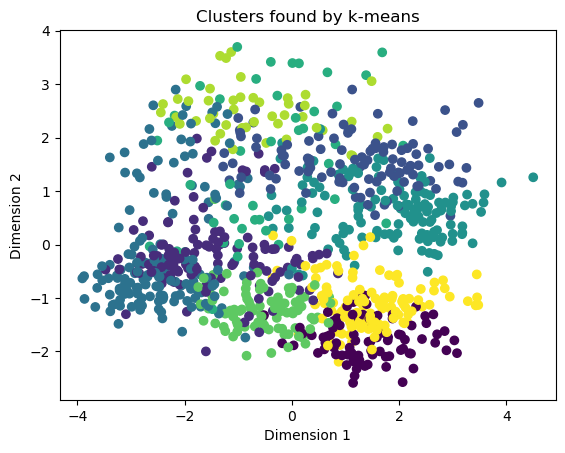

In [26]:
# create a scatter plot of the first two dimensions of the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')

# add axis labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# add a title
plt.title('Clusters found by k-means')

# show the plot
plt.show()

# Gaussian Mixture

In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [28]:
import pandas as pd

def compute_bic_table(X, max_components=10, covariance_types=['full']):
    """Compute a table of BIC scores for different numbers of components and types of covariance.
    
    Args:
        X: Input data.
        max_components: Maximum number of components to consider.
        covariance_types: List of covariance types to consider.
        
    Returns:
        bic_table: DataFrame containing the BIC scores.
    """
    # Initialize the BIC table
    bic_table = pd.DataFrame(index=range(1, max_components+1), columns=covariance_types)
    
    # Compute the BIC for different numbers of components and types of covariance
    for n_components in range(1, max_components+1):
        for covariance_type in covariance_types:
            gm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
            gm.fit(X)
            bic_table.loc[n_components, covariance_type] = gm.bic(X_normalized)
    
    return bic_table



In [39]:
bic_table = compute_bic_table(X_normalized[y==0])
display(bic_table)


# Find the lowest BIC score and its corresponding number of components and type of covariance
lowest_bic_score = bic_table.min().min()
best_n_components_index, best_covariance_type_index = np.where(bic_table == lowest_bic_score)

# Look up the actual number of components using the row index
best_n_components1 = best_n_components_index[0] + 1

# Look up the actual covariance type using the column index
best_covariance_type = bic_table.columns[best_covariance_type_index[0]]

# Display the lowest BIC score and its corresponding parameters
print(f"Lowest BIC score for class 1: {lowest_bic_score}")
print(f"Best number of components: {best_n_components1}")
print(f"Best type of covariance: {best_covariance_type}")

,full
1,19020.268569
2,1232.788507
3,-4550.718958
4,-18854.906322
5,-25529.306002
6,-25016.284859
7,-11174.021654
8,-26794.627158
9,32947994.030036
10,284190581.191361


Lowest BIC score for class 1: -26794.627158470015
Best number of components: 8
Best type of covariance: full


In [40]:
bic_table = compute_bic_table(X_normalized[y==1])
display(bic_table)


# Find the lowest BIC score and its corresponding number of components and type of covariance
lowest_bic_score = bic_table.min().min()
best_n_components_index, best_covariance_type_index = np.where(bic_table == lowest_bic_score)

# Look up the actual number of components using the row index
best_n_components = best_n_components_index[0] + 1

# Look up the actual covariance type using the column index
best_covariance_type = bic_table.columns[best_covariance_type_index[0]]

# Display the lowest BIC score and its corresponding parameters
print(f"Lowest BIC score for class 1: {lowest_bic_score}")
print(f"Best number of components: {best_n_components}")
print(f"Best type of covariance: {best_covariance_type}")

,full
1,18331.312322
2,4075.695356
3,-13392.303085
4,-17313.575213
5,-19859.370134
6,-28990.127386
7,-27234.689135
8,119375401.555609
9,300298414.821417
10,122213894.550334


Lowest BIC score for class 1: -28990.12738635205
Best number of components: 6
Best type of covariance: full


In [41]:
# Assuming you have X_normalized as input data and y as output labels
n_features = X_normalized.shape[1]

# Create a Gaussian Mixture model for each class
gm_class_0 = GaussianMixture(n_components=best_n_components1, covariance_type=best_covariance_type)
gm_class_1 = GaussianMixture(n_components=best_n_components, covariance_type=best_covariance_type)

# Fit the models to the data of each class

gm_class_0.fit(X_normalized[y==0])
gm_class_1.fit(X_normalized[y==1])

# Compute the posterior probabilities for each class
posterior_0 = gm_class_0.score_samples(X_normalized) + np.log(np.mean(y==0))
posterior_1 = gm_class_1.score_samples(X_normalized) + np.log(np.mean(y==1))

# Select the winning class based on the highest posterior probability
y_pred = (posterior_1 > posterior_0).astype(int)

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score


# Compute the average posterior probability for each class
avg_posterior_0 = np.mean(posterior_0)
avg_posterior_1 = np.mean(posterior_1)

# Select the winning class based on the highest average posterior probability
winning_class = 1 if avg_posterior_1 > avg_posterior_0 else 0

# Display the winning class
print(f"Winning class: {winning_class}")

# Create a confusion matrix
cm = confusion_matrix(y, y_pred)

# Display the confusion matrix
print(f"Confusion matrix:\n{cm}")

# Compute the precision and recall
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

# Display the precision and recall
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Winning class: 0
Confusion matrix:
[[349  61]
 [176 332]]
Precision: 0.84
Recall: 0.65
